# Afleveringsopgave 3

In [854]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure

##### a)

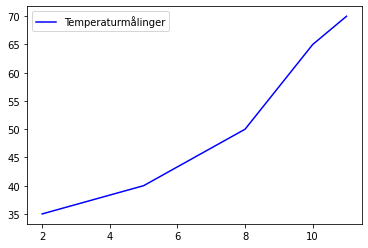

In [855]:
tid = [2.0, 5.0, 8.0, 10.0, 11.0] # Der opstilles to matricer. En for tiden (x) og en for temperaturen (y)
temperatur = [35.0, 40.0, 50.0, 65.0, 70.0]

fig, ax = plt.subplots() # Vi kan nu tegne grafen for funktionen, der går gennem disse punkter
ax.plot(tid, temperatur, "b", label = "Temperaturmålinger")
ax.legend()
plt.show()
print("\n")

Vi får en graf, der ikke er kontinuert, hvilket kan ses på de knæk der er ved hvert punkt. 

##### b)

Vi har en andengradsligning:

p(x) = a + b * x + c * x**2 

Med den kan vi opstille et ligningssytem, hvor a, b og c er de eneste ubekendte:

50.0 = a + 8b + 64c 

65.0 = a + 10b + 100c

70.0 = a + 11b + 121



In [856]:
A = np.array([[1.0, 8.0, 64.0],
              [1.0, 10.0, 100.0],
              [1.0, 11.0, 121.0]])

B = np.array([50.0, 65.0, 70.0])[:, np.newaxis]

C = np.hstack([A,B])
C


array([[  1.,   8.,  64.,  50.],
       [  1.,  10., 100.,  65.],
       [  1.,  11., 121.,  70.]])

In [857]:
C[[1,2],:] -= C[0,:]        # Først trækker vi række 0 fra 1    #
                            #    og 2 for at få 0 i søjle 0     #
C[2,:] -= 3/2 * C[1,:]      # Nu trækker vi en skaleret søjle   #
                            #    1 fra 2, for at få 0 i søjle 1 #
C[1,:] *= 1/2               # Til sidst bruger vi skalarer til  #
                            #    at etablere pivotelementerne   #
C[2,:] *= 1/3
C

array([[ 1.    ,  8.    , 64.    , 50.    ],
       [ 0.    ,  1.    , 18.    ,  7.5   ],
       [ 0.    ,  0.    ,  1.    , -0.8333]])

In [858]:
C[1,:] -= 18 * C[2,:]               # Nu reducerer vi koefficientmatricen til en 
C[0,:] -= 64 * C[2,:] + 8 * C[1,:]  # indentitetsmatrix for at finde løsningen
C

array([[  1.    ,   0.    ,   0.    , -76.6667],
       [  0.    ,   1.    ,   0.    ,  22.5   ],
       [  0.    ,   0.    ,   1.    ,  -0.8333]])

In [859]:
a, b, c = C[:,3]
a, b, c #Løsningerne på ligningssystemet 

(-76.66666666666667, 22.5, -0.8333333333333333)

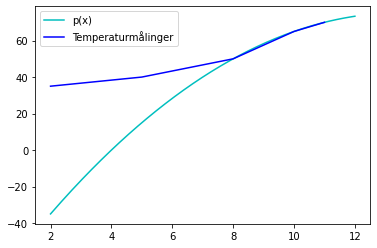

In [860]:
x = np.linspace(2, 12, 200)

y = a + b * x + c * x**2   

fig, ax = plt.subplots() # Tegning 
ax.plot(x, y, "c", label = "p(x)",)
ax.plot(tid, temperatur, "b", label = "Temperaturmålinger")
ax.legend()
plt.show()

Her kan vi se, at polynomiet passer rimelig godt på vores data i intervallet mellem vores tre punkter. Bevæger vi os ud herfra, afviger funktionen dog hurtigt fra vores data.

##### c)

Hvis vi skal have et polynomium, der går igennem fem punkter, er vi nødt til at have fem variable. Det vil sige, at vi som minium skal bruge et fjerdegradspolynomium:

p(x) = a + bx + cx^2 + dx^3 + ex^4

In [861]:
A = np.array([[1.0, 2.0, 4.0, 8.0, 16.0],
              [1.0, 5.0, 25.0, 125.0, 625.0],
              [1.0, 8.0, 64.0, 512.0, 4096.0],
              [1.0, 10.0, 100.0, 1000.0, 10000.0],
              [1.0, 11.0, 121.0, 1331.0, 14641.0]])

B = np.array([35.0, 40.0, 50.0, 65.0, 70.0])[:, np.newaxis]

a, b, c, d, e = np.linalg.solve(A,B)
a, b, c, d, e

(array([-1.9753]),
 array([32.8549]),
 array([-9.0972]),
 array([1.034]),
 array([-0.0386]))

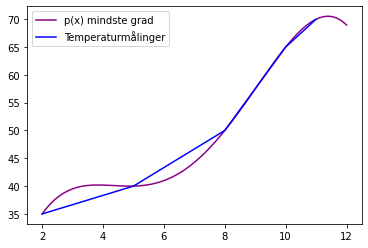

In [862]:
x = np.linspace(2, 12, 200)

y = a + b * x + c * x**2 + d * x**3 + e * x**4

fig, ax = plt.subplots() # Tegning 
ax.plot(x, y, "darkmagenta", label = "p(x) mindste grad")
ax.plot(tid, temperatur, "b", label = "Temperaturmålinger")
ax.legend()
plt.show()

<div style="page-break-after: always;"></div>

#### e)

Vi i sætter vores ligningssystem ind i en matrix, og bruger rækkeoperationer til at ændre den til echelonform.

In [863]:
A = np.array([[1.0, 5.0, 25.0, 0.0, 0.0, 0.0],
              [1.0, 8.0, 64.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 8.0, 64.0],
              [0.0, 0.0, 0.0, 1.0, 10.0, 100.0],
              [0.0, 1.0, 16.0, 0.0, 1.0, 16.0]])

B = np.array([40.0, 50.0, 50.0, 65.0, 0.0])[:, np.newaxis]

C = np.hstack([A,B])
C

array([[  1.,   5.,  25.,   0.,   0.,   0.,  40.],
       [  1.,   8.,  64.,   0.,   0.,   0.,  50.],
       [  0.,   0.,   0.,   1.,   8.,  64.,  50.],
       [  0.,   0.,   0.,   1.,  10., 100.,  65.],
       [  0.,   1.,  16.,   0.,   1.,  16.,   0.]])

In [864]:
np.set_printoptions(precision=4)

C[1,:] -= C[0,:]
C[1,:] -= C[4,:] * 2
C[[2,4],:] = C[[4,2],:]
C[2,:] -= C[1,:]
C[2,:] *= 1/9
C[4,:] -= C[3,:]
C[4,:] *= -1/2
print(C)

[[  1.       5.      25.       0.       0.       0.      40.    ]
 [  0.       1.       7.       0.      -2.     -32.      10.    ]
 [  0.       0.       1.       0.       0.3333   5.3333  -1.1111]
 [  0.       0.       0.       1.      10.     100.      65.    ]
 [ -0.      -0.      -0.      -0.       1.      18.       7.5   ]]


In [865]:
C[3,:] -= C[4,:] * 10 # Her finder vi løsning(en/erne) på ligningssystemet
C[2,:] -= C[4,:] / 3
C[1,:] += C[4,:] * 2
C[1,:] -= C[2,:] * 7
C[0,:] -= C[2,:] * 25
C[0,:] -= C[1,:] * 5
print(C)

[[   1.        0.        0.        0.        0.      -26.6667 -121.1111]
 [   0.        1.        0.        0.        0.        8.6667   50.2778]
 [   0.        0.        1.        0.        0.       -0.6667   -3.6111]
 [   0.        0.        0.        1.        0.      -80.      -10.    ]
 [  -0.       -0.       -0.       -0.        1.       18.        7.5   ]]


Nu har vi en matrix i echelonform, hvor der er strengt færre pivotelementer end søjler. Dette betyder, at matricen er underbestemt, og vores variabel f er fri. Dette betyder, at der er uendelig mange løsninger.

##### f)

Note: Kan godt se fejlene, men er stadig lidt usikker på den bedste metode, så vi prøver at bruge den samme metode ordentligt.

Vi mangler at bestemme vores frie variabel f for at få en entydig løsning. I vores data har vi fra x = 2 til x = 8 noget, der nærmer sig lineær vækst, som vi kan udregne hældningen på. Hvis vi siger, at b + 2cx bliver lig med hældningen af linjen fra (2, 35) til (8, 50), har vi et ligningssystem, vi kan løse for at finde f. Først finder vi denne hældning:

In [866]:
slope5 = (60.0 - 35.0) / (8.0 - 2.0)

print(slope5)

4.166666666666667


Dette er ca hældningen i x = 5, hvis vi antager lineær vækst fra x = 2 til x = 8. Der er ikke præcist lineær vækst, men det er den bedste approksimering vi kan finde. Vi har nu en ligning b + 2cx = slope5 som vi kan sætte ind i vores ligningssystem, for at få en entydig løsning. Da vi har punktet x = 5, bliver ligningen: b + 10c = slope5.

In [867]:
A = np.array([[1.0, 5.0, 25.0, 0.0, 0.0, 0.0],
              [1.0, 8.0, 64.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 8.0, 64.0],
              [0.0, 0.0, 0.0, 1.0, 10.0, 100.0],
              [0.0, 1.0, 16.0, 0.0, 1.0, 16.0],
              [0.0, 1.0, 10.0, 0.0, 0.0, 0.0]])

B = np.array([40.0, 50.0, 50.0, 65.0, 0.0, slope5])[:, np.newaxis]

C = np.hstack([A,B])
S = np.linalg.solve(A, B)
S

array([[ 1.2222e+01],
       [ 6.9444e+00],
       [-2.7778e-01],
       [ 3.9000e+02],
       [-8.2500e+01],
       [ 5.0000e+00]])

Nu er der ingen ubekendte, og vi kan plotte funktionerne.

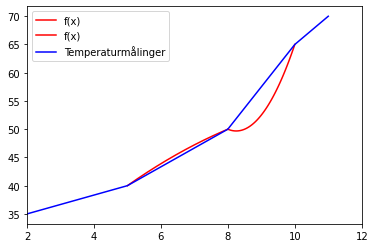

In [868]:
a, b, c, d, e, f = S

x1 = np.linspace(5, 8, 150)
x2 = np.linspace(8, 10, 100)

p1 = a + b * x1 + c * x1**2
p2 = d + e * x2 + f * x2**2

fig, ax = plt.subplots() # Tegning 
ax.plot(x1, p1, "r", x2, p2, 'r', label = "f(x)") # Dette er en samling af to funktioner, der tilsammen udgør f
ax.plot(tid, temperatur, 'b', label = "Temperaturmålinger")
ax.legend()

plt.xlim([2, 12])
plt.show()

##### g)



Hvis vi først kigger på metoden fra b), er det tydeligt, at funktionen afviger kraftigt fra vores data. Metoden fra c) afviger mindre, og krydser grafen i 5. Hvis vi sammenligner c) med f) ser vi dog, at denne graf ligger tættest på grafen for vores data, når temperaturen er 55 grader. Vi ville derfor helst bruge denne til at estimere i dette punkt. Hvis vi kigger over hele intervallet [2;12], ville vi dog helst bruge metoden fra c). 